# **Module 5: Measures of Association**

As we have already seen, evaluating the relationship between variables is at the heart of data mining. We have a number of techniques at our disposal:
1. **DISTANCE CALCULATIONS** like Euclidian, Manhattan, Cosine Similarity (and some others)
2. **MEASURES OF INDEPENDENCE** like Chi Square, Covariance, and Correlation
3. **PREDICTIVE MEASURES** like Regression and ANOVA

In this module, you will learn how to:
* Explain distance between data in terms of Chi Square, Correlation, and Cosine Similarity
* Set up Cosine Similarity calculations
* Set up Chi Square calculations
* Set up Correlation calculations



#**0. Preparation and Setup**
We are working with our adult dataset again, so we're loading our libraries and our dataset just like last time. Since we are working with more involved math this time around, we will need more functionality:
* **Scikit-Learn**: We will use the cosine_similarity function from the [scikit-learn metrics module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). If you click that link, you'll see that this is the big math module--knowing which functions to use will allow you to skip programming much of the math by hand. Very practical! Cosine similarity is located in the [pairwise submodule](https://scikit-learn.org/stable/modules/metrics.html#metrics).
* **Scipy**: This is numpy's ["big sister" for advanced math](https://docs.scipy.org/doc/scipy-1.6.3/reference/). We will use it for Chi Square calculations.
* **Math**: The [math package](https://docs.python.org/3/library/math.html) allows us to do advanced math, calculate logarithmic functions etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

from IPython.display import HTML # This is just for me so I can use HTML
from IPython.display import Image # This is just for me so I can embed images
from IPython.display import IFrame # This is just for me so I can embed videos

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified25.csv")

#Verifying that we can see the data
adult.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


# **1. Cosine Similarity**

Cosine Similarity is the last similarity measure that we haven't discussed yet (we've already talked about Euclidean and Manhattan Distance).

<img src="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png">

As you can see, while Euclidean and Manhattan Distance are just plain calculations, Cosine Similarity works with angles. This is where things get a little more involved.

Mathematically speaking, **Cosine Similarity** is the normalized dot product between two vectors, i.e. two attributes in our dataframe. The steps are
1. Calculate the **dot product** between two attributes (or, in math language:
Calculate the product of the Euclidean magnitudes of these two vectors). If you're not sure what dot product is, [**here is a great explanation**](https://www.mathsisfun.com/algebra/vectors-dot-product.html). (You should definitely look at this link!).
2. Calculate the **cosine of the angle** between these two vectors.
Quick helper: The cosine of 0° is 1 (meaning the two vectors are identical), and it is less than 1 for any other angle. It is 0 for a 90° angle.

<img src ="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cosine.png">


Since Cosine Similarity can be computed relatively quickly, it is very popular.

More information is here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

## **1.1 A Small Example**
Here is how this works on a very small example, with two made-up vectors.
Note that all the vectors **MUST be numeric**! (One big reason why we  covered preprocessing techniques in the previous module).

In [ ]:
# Here are the two vectors. THink of them like numeric attributes from your dataframe:
a = np.array([1,2,3])
b = np.array([1,1,4])

print(a,b)

[1 2 3] [1 1 4]


First, we do this manually:

In [ ]:
# We can MANUALLY compute cosine similarity (this is where we are using the math library we called above)
dot = np.dot(a, b)  # computing the dot product with the dot function
norma = np.linalg.norm(a)  # normalizing vector a
normb = np.linalg.norm(b)  # normalizing vector b
cos1 = dot / (norma * normb)  # computing the cosine by dividing the dot product by the normalized vectors as shown in the cartoon above

print(cos1)

0.9449111825230682


In [ ]:
# Now we need to find the angle from the cosine. This requires two steps:
# 1. convert the angle to radians
# 2. calculate the degrees

angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)

print(cos1, angle_in_radians1, degrees1)

0.9449111825230682 0.3334731722518318 19.106605350869078


So, that was straight-up programmed math.

But this is Data Mining, and we have fancy packages like sklearn.metrics to speed things up. So, we'll do this over again:

In [15]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
# cos2 = cosine_similarity(a,b)

**Wait, what?** Let's **read the error message** here: It tells us that something is wrong with the way our input data is formatted. In fact, the cosine_similarity function expects two-dimensional arrays. Our input data has just one each. That's why we need to reformat (=reshape) out input data. Let's try this again:

In [ ]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
aa = a.reshape(1,3) # we have 3 values in our array
ba = b.reshape(1,3) # we have 3 values in our array
cos3 = cosine_similarity(aa, ba)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians3 = math.acos(cos3)
degrees3 = math.degrees(angle_in_radians3)

print(cos3, angle_in_radians3, degrees3)

[[0.94491118]] 0.3334731722518315 19.10660535086906


As you can see, both, the manual calculation and the calculation with  scikit-learn get us identical results. On to bigger and better things!

##**1.2 Cosine Similarity with the adult Dataset**
Now we are going to apply what we have learned above to the adult dataset. Remember that the inputs MUST be numeric!

In [2]:
# First, we convert two attributes to numpy arrays
a = np.array(adult.educationyears)
b = np.array(adult.incomeUSD)

# Manually computing cosine similarity
dot = np.dot(a, b)  # the dot product
norma = np.linalg.norm(a)  # normalizing vector a
normb = np.linalg.norm(b)  # normalizing vector b
cos1 = dot / (norma * normb)  # computing the angle by dividing the dot product by the normalized vectors

print(cos1)

0.8065851027395996


In [6]:
# First, we convert two attributes to numpy arrays
a = np.array(adult.age)
b = np.array(adult.incomeUSD)

# Manually computing cosine similarity
dot = np.dot(a, b)  # the dot product
norma = np.linalg.norm(a)  # normalizing vector a
normb = np.linalg.norm(b)  # normalizing vector b
cos1 = dot / (norma * normb)  # computing the angle by dividing the dot product by the normalized vectors

print(cos1)

angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)
degrees1

0.7824591178811251


38.51371537133685

## Your Turn
1. Compute the angle in degrees from the cos1 value shown above. Use the code field below.

In [3]:
angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)
degrees1

36.23638399642195

2. Now, use sklearn.metrics to compute the angle between adult.educationyears and adult.incomeUSD.

Remember to reshape the input data, where the ??? are in the code below. Also remember that each vector has 25000 values.

In [4]:
aa = a.reshape(1,???)
ba = b.reshape(1,???)
cos = cosine_similarity(aa, ba)

angle_in_radians = math.acos(cos)
degrees = math.degrees(angle_in_radians)

print(cos, angle_in_radians, degrees)

TypeError: 'Series' object cannot be interpreted as an integer

In [ ]:
# Here is a solution that uses the spatial package from scipy

a = np.array(adult.educationyears)
b = np.array(adult.incomeUSD)

result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

#**2. Chi Square**
We just learned that Cosine Similarity explains the relationship between numerical attributes or vectors. But what about the other BIG data type--categorical data? That is where Chi Square comes in.

To understand how Chi Square works, let's quickly review **hypothesis testing**: You may remember that all hypothesis testing starts by setting up an H0 (null hypothesis) and an Ha (alternative hypothesis). The null hypothesis states whether you assume that the two variables to compare are either dependent or independent (or equal, depending on the math that follows). Then, we use complicated math that results in a p-value. If this p-value is > 0.05 (5%), then your H0 is most likely true; if it is < 0.05 (5%), then your H0 is potentially wrong and Ha is more likely true.

Click [**this link**](https://www.mathsisfun.com/data/chi-square-test.html) to see a great explanation and watch the video below.

In [14]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/qYOMO83Z1WU?si=BkdaeucpnMuCiSYm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**THINGS TO REMEMBER** about a Chi Square test:
1. Is a hypothesis test based on categorical attributes.
2. Uses as its H0 that the two variables under investigation are independent
3. Uses a chi square table
3. If the resulting p-value is > 0.05, both variables are independent
4. If the resulting p-value is < 0.05, both variables are dependent

Soooo ... ever wondered whether there was a connection between the color of a character's uniform and their survival rate on Star Trek's U.S.S. Enterprise? Wonder no more, but [check out the Chi Square calculation right here](https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/).

<center><img src ="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/03/red_shirt_meme.jpg?resize=300%2C240&ssl=1"></center>

**In terms of programming**, the most convenient, way is [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). chi2_contingency automatically computes the expected values from the chi square table, so you don't have to. The entire output can be captured in 4 variables: **chi square number, p-value, degrees of freedom and the array itself.** chi2_contingency works with n-dimensional contingency tables. This is what we need!

In [7]:
# Note that pd.crosstab establishes the two-way table
# We can even use a print command to format the output:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(adult.nativecountry, adult.occupation).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 1988.0626525534976 ,p-value: 5.772158322080836e-155, Degrees of Freedom: 574


In [8]:
# Note that pd.crosstab establishes the two-way table
# We can even use a print command to format the output:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(adult.sex, adult.occupation).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 4467.722623524094 ,p-value: 0.0, Degrees of Freedom: 14


In [10]:
0>0.05

False

# **3. Covariance and Correlation**
Covariance is, essentially, the little brother of correlation. The goal for both calculations/ algorithms (about time we used that term, isn't it?) is to determine if two variables are tightly enough connected that we can detect a pattern to their changes. In other words, we want to see if, when one variable changes, the other variable changes as well, in a predictable fashion.

More about Correlation and Covariance in the video below


In [16]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mwZbt11azGo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


##**3.1 Covariance**
Covariance indicates the relationship of two variables whenever one variable changes. If an **increase** in one variable results in an **increase** in the other variable, both variables are said to have a positive covariance (the same is two if both variables decrease), which show up as a positive number. If an increase in one variable causes a decrease in the other, that is a negative covariance, i.e. an inverse relationships, which is indicated by a negative number.

Since covariance uses only numeric attributes, we can get np.cov() to work easily with educationyears and incomeUSD. For that purpose, we will use np.cov().

Note that, by default np.cov calculates the **SAMPLE** covariance. To get the **POPULATION** covariance, I had to set the Degrees of Freedom to 0. Or, as shown below, you can set bias to True. If you omit bias, you will calculate the SAMPLE variance.

In [16]:
# SAMPLE covariance assumes that degrees of freedom, i.e. ddof=1
np.cov([adult.educationyears],[adult.incomeUSD])[0][1]

32218.408655859832

In [17]:
# POPULATION covariance can be calculated by setting ddof=0
np.cov([adult.educationyears],[adult.incomeUSD], ddof=0)[0][1]

32217.1199195136

In [18]:
# POPULATION covariance with bias=True setting
np.cov([adult.educationyears],[adult.incomeUSD], bias=True)[0][1]

32217.1199195136

In [19]:
# SAMPLE covariance omitting bias=True setting
np.cov([adult.educationyears],[adult.incomeUSD])[0][1]

32218.408655859832

In [21]:
# SAMPLE covariance assumes that degrees of freedom, i.e. ddof=1
np.cov([adult.age],[adult.incomeUSD],ddof=0)[0][1]

117999.49039028483

So, what do all these numbers mean?

Take the last one here: If the years of education increase by 1, the income in USD increases by $32,218. As you can see, the bias setting does not make much of a difference with smaller numbers. With larger numbers, that is a very different ballgame.

## Your Turn
Now, calculate the covariance between age and incomeUSD for the POPULATION (remember the bias setting!). Use the code line below.

In [ ]:
np.cov([adult.educationyears],[adult.incomeUSD], ddof=0)[0][1]

## **3.2 Correlation**

As with Chi Square and Covariance, there are numerous ways to calculate the Pearson Correlation Coefficient. The most efficient and elegant way to do this is using the corr() function in pandas. This function can also handle multiple correlations and will, in fact, produce a table with the R-squared values. NOTE that all inputs must be numeric!

If correlation (i.e. the Pearson Correlation Coefficient) is between -1 and 0, then the attributes are negatively correlated (as one grows, another one falls). If correlation is between 0 and +1, then the attributes are positively correlated (both move in the same direction). The correlation coefficient is typically called r.

Check out the graphic below to see what the different values of r look like.

<img src = "https://media.nagwa.com/359143010784/en/thumbnail_l.jpeg">

Now on to our task!

In [11]:
# We first want to see if educationyears and incomeUSD are correlated. So, we pass both arrays into the function:
corr_edUSD = adult['educationyears'].corr(adult['incomeUSD'])
corr_edUSD

0.28552663471074824

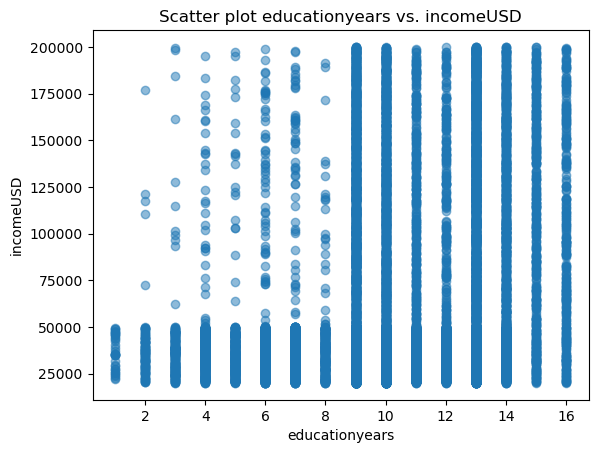

In [12]:
# We can now plot this with pyplot
plt.scatter(adult['educationyears'], adult['incomeUSD'], alpha=0.5)
plt.title('Scatter plot educationyears vs. incomeUSD')
plt.xlabel('educationyears')
plt.ylabel('incomeUSD')
plt.show()

In [13]:
# The power of the corr() function lies in its ability to handle multiple dimensions at the same time:
corr = adult.corr(numeric_only=True) # We have to specify that we want to work ONLY with numbers!
corr

,age,educationyears,hoursperweek,incomeUSD
age,1.000000,0.032765,0.069045,0.195364
educationyears,0.032765,1.000000,0.145903,0.285527
hoursperweek,0.069045,0.145903,1.000000,0.199360
incomeUSD,0.195364,0.285527,0.199360,1.000000


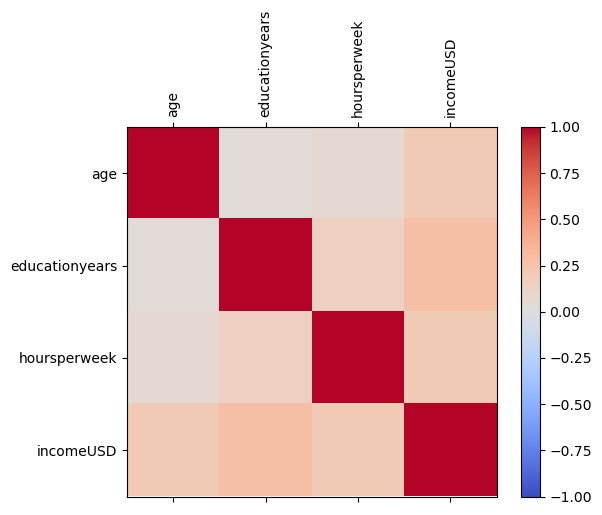

In [14]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In the examples above, we see the most frequently used Pearson Correlation in action. The corr() function allows us to work with other kinds of correlations, as well, including the Spearman correlation.
For some great examples, take a look at this website: https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science

##Your Turn
Now, calculate the following:
1. The COVARIANCE between hoursperweek and incomeUSD

In [ ]:
np.cov([adult.hoursperweek],[adult.incomeUSD])[0][1]

2. The CORRELATION between hoursperweek and incomeUSD

In [ ]:
corr_edUSD = adult['hoursperweek'].corr(adult['incomeUSD'])
print(corr_edUSD)

plt.scatter(adult['hoursperweek'], adult['incomeUSD'], alpha=0.5)
plt.title('Scatter plot hoursperweek vs. incomeUSD')
plt.xlabel('hoursperweek')
plt.ylabel('incomeUSD')
plt.show()

Can you explain how the two numbers are related?

In [ ]:
adult.corr(numeric_only=True)
117999.4